# Spektralanlyse

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

## 7.1 Zu den Grundlagen

7.1.1 Demonstrieren Sie, wie sich die Länge n einer Zeitreihe auf das Spektrum auswirkt.
![n13](../Messdaten/20102025_Spektralanalyse/Daten/Bilder/1_10Hz_700mV_n13_1000Hz_ASpek.png)
![n150](../Messdaten/20102025_Spektralanalyse/Daten/Bilder/1_10Hz_700mV_n150_1000Hz_ASpek.png)
![n1000](../Messdaten/20102025_Spektralanalyse/Daten/Bilder/1_10Hz_700mV_n1000_1000Hz_ASpek.png)

7.1.2 Demonstrieren Sie, wie sich die Abtastfrequenz $f_s$ einer Zeitreihe auf das Spektrum auswirkt.

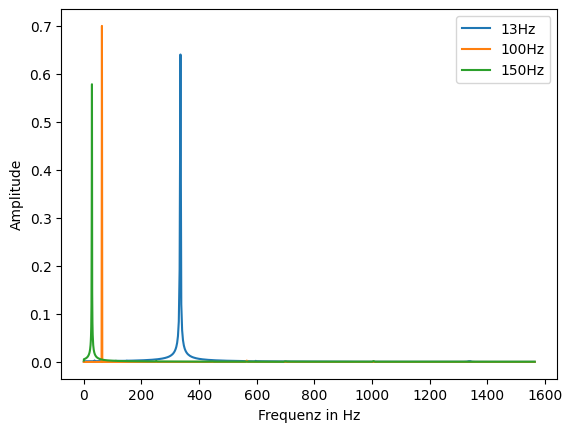

In [2]:
f13 = np.loadtxt('../Messdaten/20102025_Spektralanalyse/Daten/11_10Hz_700mV_n1000_13Hz.dat', delimiter=",")
f100 = np.loadtxt('../Messdaten/20102025_Spektralanalyse/Daten/11_10Hz_700mV_n1000_100Hz.dat', delimiter=",")
f150 = np.loadtxt('../Messdaten/20102025_Spektralanalyse/Daten/11_10Hz_700mV_n1000_150Hz.dat', delimiter=",")
freq = 2*np.pi/1000*np.arange(500)*np.arange(500) # exponent: 2*pi*i*j*k*/*n

fft13 = fft(f13[:,1])
fft100 = fft(f100[:,1])
fft150 = fft(f150[:,1])
A13, A100, A150 = [], [], []

for i in range(len(fft13)):
    if i == 0:
        A13.append(1/1000*abs(fft13[i]))
    elif i > 499:
        break
    else:
        A13.append(2/1000*abs(fft13[i]))

for i in range(len(fft100)):
    if i == 0:
        A100.append(1/1000*abs(fft100[i]))
    elif i > 499:
        break
    else:
        A100.append(2/1000*abs(fft100[i]))

for i in range(len(fft150)):
    if i == 0:
        A150.append(1/1000*abs(fft150[i]))
    elif i > 499:
        break
    else:
        A150.append(2/1000*abs(fft150[i]))


fig, ax = plt.subplots()
ax.plot(freq, A13, label="13Hz")
ax.plot(freq, A100, label="100Hz")
ax.plot(freq, A150, label="150Hz")
ax.set_xlabel("Frequenz in Hz")
ax.set_ylabel("Amplitude")
ax.legend()
plt.show()

Obiges Bild stimmt nicht mit den Plots aus dem Labor überein.
![f13](../Messdaten/20102025_Spektralanalyse/Daten/Bilder/11_10Hz_700mV_n1000_13Hz_ASpek.png)
![f100](../Messdaten/20102025_Spektralanalyse/Daten/Bilder/11_10Hz_700mV_n1000_100Hz_ASpek.png)
![f150](../Messdaten/20102025_Spektralanalyse/Daten/Bilder/11_10Hz_700mV_n1000_150Hz_ASpek.png)

7.1.3 Wie wirkt sich eine überlagerte Gelichspannung (*offset*) aus?

7.1.4 Kann man die Amplituden im Spektrum wiederfinden?

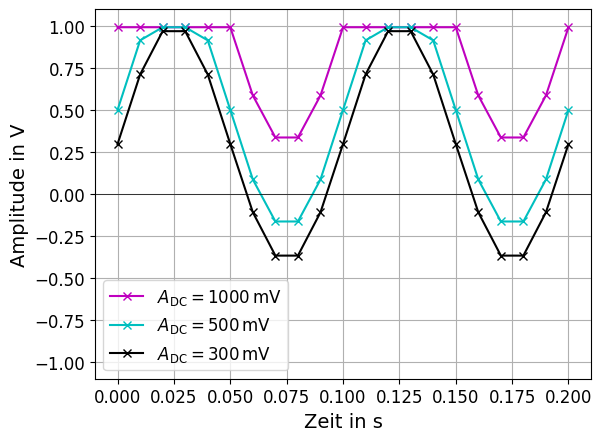

In [3]:
adc300 = np.loadtxt("../Messdaten/20102025_Spektralanalyse/Daten/12_10Hz_700mV_300mV_n1000_100Hz.dat", delimiter=",", max_rows=21)
adc500 = np.loadtxt("../Messdaten/20102025_Spektralanalyse/Daten/12_10Hz_700mV_500mV_n1000_100Hz.dat", delimiter=",", max_rows=21)
adc1000 = np.loadtxt("../Messdaten/20102025_Spektralanalyse/Daten/12_10Hz_700mV_1000mV_n1000_100Hz.dat", delimiter=",", max_rows=21)

fig, ax = plt.subplots()
ax.plot(adc1000[:,0], adc1000[:,1], "x-m", label=r"$A_\mathrm{DC}=1000\,\mathrm{mV}$")
ax.plot(adc500[:,0], adc500[:,1], "x-c", label=r"$A_\mathrm{DC}=500\,\mathrm{mV}$")
ax.plot(adc300[:,0], adc300[:,1], "x-k", label=r"$A_\mathrm{DC}=300\,\mathrm{mV}$")
ax.set_xlabel("Zeit in s", fontsize=14)
ax.set_ylabel("Amplitude in V", fontsize=14)
ax.axhline(0, linewidth=0.5, color="k")
ax.tick_params(labelsize=12)
ax.set_ylim(-1.1,1.1)
ax.set_xlim(-0.01,0.21)
ax.legend(fontsize=12)
ax.grid()
plt.show()

![300mV](../Messdaten/20102025_Spektralanalyse/Daten/Bilder/12_10Hz_700mV_300mV_n1000_100Hz_ASpek.png)
![500mV](../Messdaten/20102025_Spektralanalyse/Daten/Bilder/12_10Hz_700mV_500mV_n1000_100Hz_ASpek.png)
![1000mV](../Messdaten/20102025_Spektralanalyse/Daten/Bilder/12_10Hz_700mV_1000mV_n1000_100Hz_ASpek.png)

7.1.4 Bleibt die Signalleistung im Spektrum erhalten?
Parsevaltheorem: $$\frac{1}{n^2}\sum_{k=0}^{n-1}\vert X_k\vert^2=\frac{1}{n}\sum_{j=0}^{n-1}\vert x_j\vert^2$$

In [4]:
zeit = np.loadtxt('../Messdaten/20102025_Spektralanalyse/Daten/13_10Hz_700mV_n1000_100Hz.dat', delimiter=",", usecols=1)
freq = np.loadtxt('../Messdaten/20102025_Spektralanalyse/Daten/13_10Hz_700mV_n1000_100Hz_Spek.dat', delimiter=",")
re = freq[:,2]
im = freq[:,3]

n = 1000
Xk = re**2+im**2
xj = abs(zeit)**2
left = np.sum(Xk)/n**2
right = np.sum(xj)/n
print(f"Parseval-Theorem: {left} = {right}, {left==right}")

Parseval-Theorem: 0.24497070312500024 = 0.68189697265625, False


## 7.3 Zum Analog-Digital-Wandler
7.3.4 Stellen Sie die Werte für einen 4-Bit-Wandler in einem Histogramm dar. Wie sollte man die Bins des Histogramms wählen? Was passiert, wenn man keine gute Wahl der Bin-Positionen wählt?

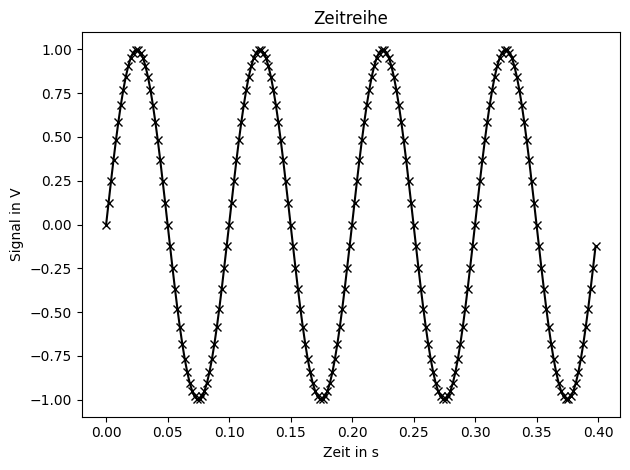

In [12]:
sig = np.loadtxt('../Messdaten/20102025_Spektralanalyse/Daten/33_10Hz_1000mV_n200_500Hz_16b.dat', delimiter=",")

fig, ax = plt.subplots()
ax.plot(sig[:,0], sig[:,1], "x-k")
ax.set_xlabel("Zeit in s")
ax.set_ylabel("Signal in V")
plt.title("Zeitreihe")
fig.tight_layout()
plt.show()

## 7.5 Zum Rauschen


7.5.1 Abweichung eines 1V Signals von einem idealen Sinus durch Quantisierungsrauschen eines 4bit ADC (aus 7.3.3)

![4b](..\Messdaten\20102025_Spektralanalyse\Daten\Bilder\33_10Hz_1000mV_n200_500Hz_4b.png)

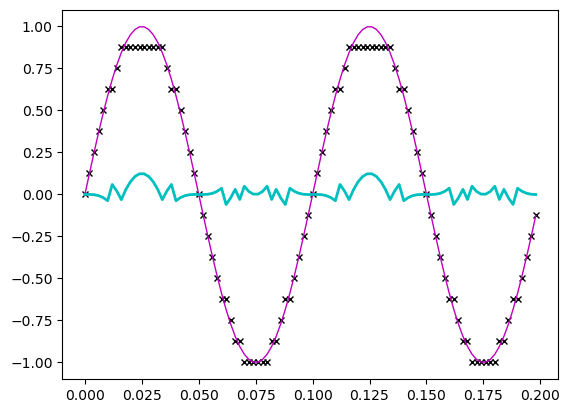

[[ 0.00000000e+00  0.00000000e+00]
 [ 2.00000000e-03  3.33233564e-04]
 [ 4.00000000e-03 -1.31011284e-03]
 [ 6.00000000e-03 -6.87544732e-03]
 [ 8.00000000e-03 -1.82463259e-02]
 [ 1.00000000e-02 -3.72147477e-02]
 [ 1.20000000e-02  5.95471059e-02]
 [ 1.40000000e-02  2.05132428e-02]
 [ 1.60000000e-02 -3.06720745e-02]
 [ 1.80000000e-02  2.98270525e-02]
 [ 2.00000000e-02  7.60565163e-02]
 [ 2.20000000e-02  1.07287251e-01]
 [ 2.40000000e-02  1.23026728e-01]
 [ 2.60000000e-02  1.23026728e-01]
 [ 2.80000000e-02  1.07287251e-01]
 [ 3.00000000e-02  7.60565163e-02]
 [ 3.20000000e-02  2.98270525e-02]
 [ 3.40000000e-02 -3.06720745e-02]
 [ 3.60000000e-02  2.05132428e-02]
 [ 3.80000000e-02  5.95471059e-02]
 [ 4.00000000e-02 -3.72147477e-02]
 [ 4.20000000e-02 -1.82463259e-02]
 [ 4.40000000e-02 -6.87544732e-03]
 [ 4.60000000e-02 -1.31011284e-03]
 [ 4.80000000e-02  3.33233564e-04]
 [ 5.00000000e-02  1.22464680e-16]
 [ 5.20000000e-02 -3.33233564e-04]
 [ 5.40000000e-02  1.31011284e-03]
 [ 5.60000000e-02  6

In [ ]:
adc4b = np.loadtxt("../Messdaten/20102025_Spektralanalyse/Daten/33_10Hz_1000mV_n200_500Hz_4b.dat", delimiter=",", max_rows=100)


sin = np.sin(2*np.pi*10*adc4b[:,0])
fehler = np.zeros((100,2))
for i in range(100):
    fehler[i,1] = sin[i] - adc4b[i,1]
    fehler[i,0] = adc4b[i,0]

fig, ax = plt.subplots()
ax.plot(adc4b[:,0], adc4b[:,1], "xk", ms=4)
ax.plot(adc4b[:,0], sin, "-m", lw=1)
ax.plot(adc4b[:,0], fehler[:,1], "-c", lw=2)
ax.set_ylim(-1.1,1.1)
plt.show()
#1

print(fehler)
np.savetxt("daten.csv", fehler, delimiter=",", fmt="%.5f")